# Problem Statement:

# Let's import required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')


# We will import the csv file for analysis now:

In [2]:
cd=pd.read_csv("temperature.csv")
data=pd.DataFrame(data=cd)
data

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Above is the list of all columns

In [4]:
data.shape

(7752, 25)

Our dataset has 7752 rows and 25 columns.

In [5]:
data.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Except date column, all other columns are object type column.

In [6]:
#pd.set_option('display.max_columns',None)
data.describe().T

count         mean         std          min          25%  \
station           7750.0    13.000000    7.211568     1.000000     7.000000   
Present_Tmax      7682.0    29.768211    2.969999    20.000000    27.800000   
Present_Tmin      7682.0    23.225059    2.413961    11.300000    21.700000   
LDAPS_RHmin       7677.0    56.759372   14.668111    19.794666    45.963543   
LDAPS_RHmax       7677.0    88.374804    7.192004    58.936283    84.222862   
LDAPS_Tmax_lapse  7677.0    29.613447    2.947191    17.624954    27.673499   
LDAPS_Tmin_lapse  7677.0    23.512589    2.345347    14.272646    22.089739   
LDAPS_WS          7677.0     7.097875    2.183836     2.882580     5.678705   
LDAPS_LH          7677.0    62.505019   33.730589   -13.603212    37.266753   
LDAPS_CC1         7677.0     0.368774    0.262458     0.000000     0.146654   
LDAPS_CC2         7677.0     0.356080    0.258061     0.000000     0.140615   
LDAPS_CC3         7677.0     0.318404    0.250362     0.000000     0.101388   
LDAPS_CC4         7677.0     0.299191    0.254348     0.000000     0.081532   
LDAPS_PPT1        7677.0     0.591995    1.945768     0.000000     0.000000   
LDAPS_PPT2        7677.0     0.485003    1.762807     0.000000     0.000000   
LDAPS_PPT3        7677.0     0.278200    1.161809     0.000000     0.000000   
LDAPS_PPT4        7677.0     0.269407    1.206214     0.000000     0.000000   
lat               7752.0    37.544722    0.050352    37.456200    37.510200   
lon               7752.0   126.991397    0.079435   126.826000   126.937000   
DEM               7752.0    61.867972   54.279780    12.370000    28.700000   
Slope             7752.0     1.257048    1.370444     0.098475     0.271300   
Solar radiation   7752.0  5341.502803  429.158867  4329.520508  4999.018555   
Next_Tmax         7725.0    30.274887    3.128010    17.400000    28.200000   
Next_Tmin         7725.0    22.932220    2.487613    11.300000    21.300000   

                          50%          75%          max  
station             13.000000    19.000000    25.000000  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.400000    24.900000    29.900000  
LDAPS_RHmin         55.039024    67.190056    98.524734  
LDAPS_RHmax         89.793480    93.743629   100.000153  
LDAPS_Tmax_lapse    29.703426    31.710450    38.542255  
LDAPS_Tmin_lapse    23.760199    25.152909    29.619342  
LDAPS_WS             6.547470     8.032276    21.857621  
LDAPS_LH            56.865482    84.223616   213.414006  
LDAPS_CC1            0.315697     0.575489     0.967277  
LDAPS_CC2            0.312421     0.558694     0.968353  
LDAPS_CC3            0.262555     0.496703     0.983789  
LDAPS_CC4            0.227664     0.499489     0.974710  
LDAPS_PPT1           0.000000     0.052525    23.701544  
LDAPS_PPT2           0.000000     0.018364    21.621661  
LDAPS_PPT3           0.000000     0.007896    15.841235  
LDAPS_PPT4           0.000000     0.000041    16.655469  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178230  
Solar radiation   5436.345215  5728.316406  5992.895996  
Next_Tmax           30.500000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000

# Outcome of describe of datasets:

In [7]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Our dataset does contains null values. Let's see the same thing with the help of heatmap.

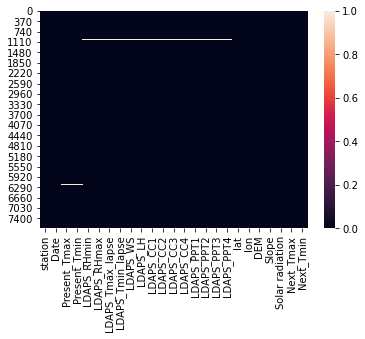

In [8]:
sns.heatmap(data.isnull())

In [9]:
data.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [10]:
data.drop('Date', axis=1, inplace=True)

# Repalcing Null Values:

In [11]:
for i in data.columns[data.isnull().any(axis=0)]:
    data[i].fillna(data[i].mean(),inplace=True)
    
#We have replaced null values of all columns with mean

In [12]:
data.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4 columns we get information of LDAPS model forecast of next-day with 6-6 hours split average cloud cover. Lets take average of this column at one place

In [13]:
#data['LDAPS_CC']=(data['LDAPS_CC1']+data['LDAPS_CC2']+data['LDAPS_CC3']+data['LDAPS_CC4'])/4
data['LDAPS_CC'] = data[['LDAPS_CC1', 'LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']].mean(axis=1)

In LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 columns we get information of LDAPS model forecast of next-day with 6-6 hours split average precipitation. Lets take average of this column at one place

In [14]:
data['LDAPS_PPT'] = data[['LDAPS_PPT1', 'LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']].mean(axis=1)

Now let's drop the previous columns which are not required now:

In [15]:
list=['LDAPS_CC1', 'LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
data.drop(list, axis=1, inplace=True)

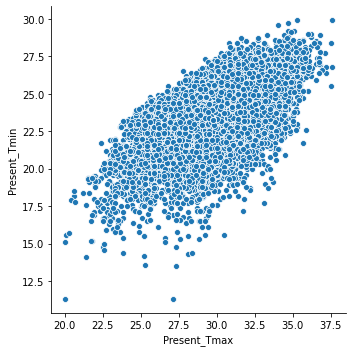

In [16]:
sns.relplot(x='Present_Tmax',y='Present_Tmin',data=data, kind='scatter')

We can see positive linear relation between Present_Tmax and Present_Tmin.

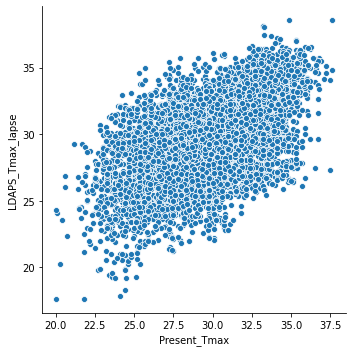

In [17]:
sns.relplot(x='Present_Tmax', y='LDAPS_Tmax_lapse',data=data, kind='scatter')

We can see positive linear relation between Present_Tmax and LDAPS_Tmax_lapse.

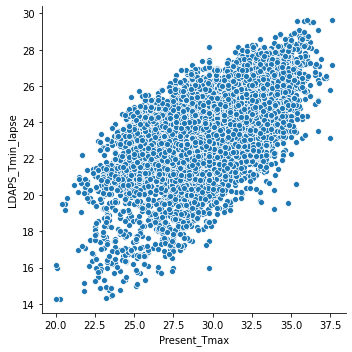

In [18]:
sns.relplot(x='Present_Tmax', y='LDAPS_Tmin_lapse',data=data, kind='scatter')

We can see positive linear relation between Present_Tmax and LDAPS_Tmin_lapse.

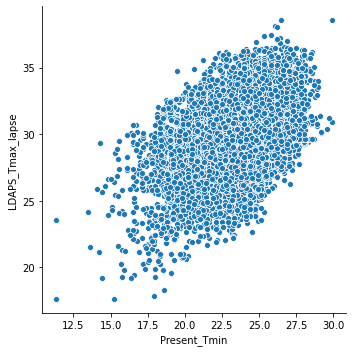

In [19]:
sns.relplot(x='Present_Tmin', y='LDAPS_Tmax_lapse',data=data, kind='scatter')

We can see positive linear relation between Present_Tmin and LDAPS_Tmax_lapse.

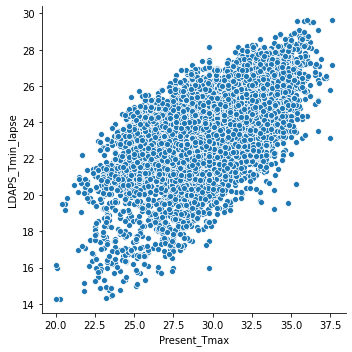

In [20]:
sns.relplot(x='Present_Tmax', y='LDAPS_Tmin_lapse',data=data, kind='scatter')

We can see positive linear relation between Present_Tmax and LDAPS_Tmin_lapse.

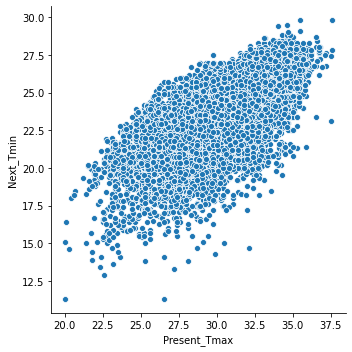

In [21]:
sns.relplot(x='Present_Tmax', y='Next_Tmin',data=data, kind='scatter')

We can see positive linear relation between Present_Tmax and Next_Tmin.

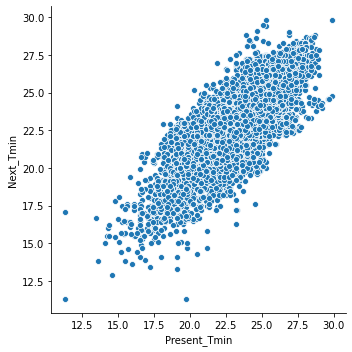

In [22]:
sns.relplot(x='Present_Tmin', y='Next_Tmin',data=data, kind='scatter')

We can see positive linear relation between Present_Tmin and Next_Tmin.

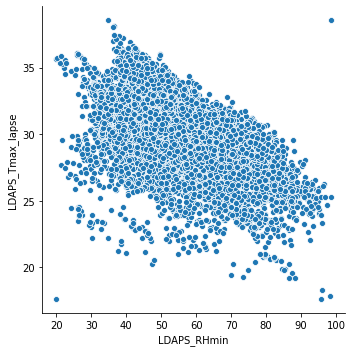

In [23]:
sns.relplot(x='LDAPS_RHmin', y='LDAPS_Tmax_lapse',data=data, kind='scatter')

We can see negative relation between LDAPS_RHmin and LDAPS_Tmax_lapse.

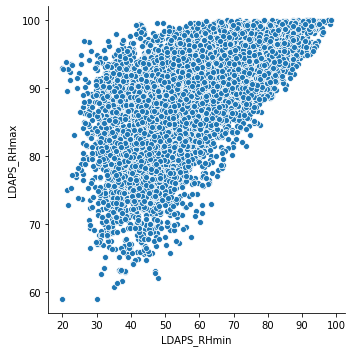

In [24]:
sns.relplot(x='LDAPS_RHmin', y='LDAPS_RHmax',data=data, kind='scatter')

We can see positive relation between LDAPS_RHmin and LDAPS_RHmax.

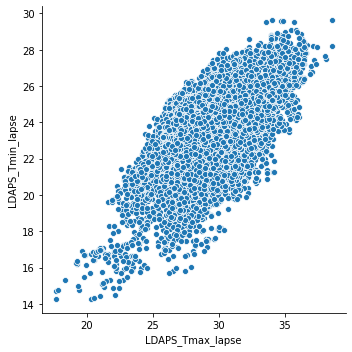

In [25]:
sns.relplot(x='LDAPS_Tmax_lapse', y='LDAPS_Tmin_lapse',data=data, kind='scatter')

We can see positive relation between LDAPS_Tmax_lapse and LDAPS_Tmin_lapse.

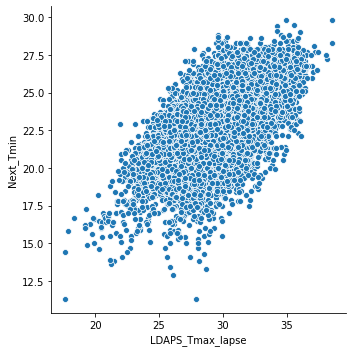

In [26]:
sns.relplot(x='LDAPS_Tmax_lapse', y='Next_Tmin',data=data, kind='scatter')

We can see positive relation between LDAPS_Tmax_lapse and Next_Tmin.

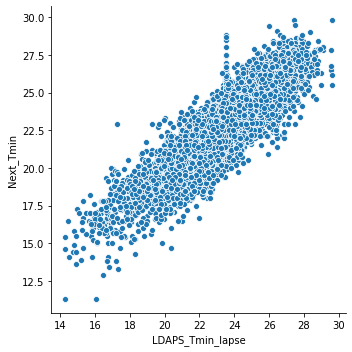

In [27]:
sns.relplot(x='LDAPS_Tmin_lapse', y='Next_Tmin',data=data, kind='scatter')

We can see positive relation between LDAPS_Tmin_lapse and Next_Tmin.

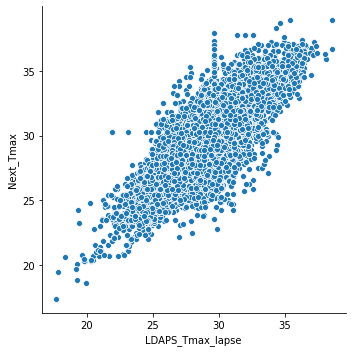

In [28]:
sns.relplot(x='LDAPS_Tmax_lapse', y='Next_Tmax',data=data,kind='scatter')

We can see positive linear relation between LDAPS_Tmax_lapse and Next_Tmax

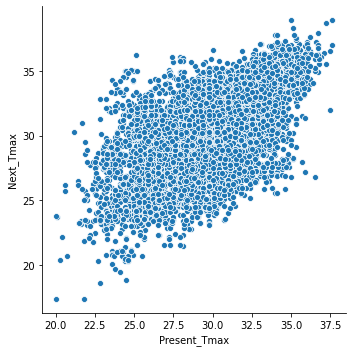

In [29]:
sns.relplot(x='Present_Tmax',y='Next_Tmax',data=data,kind='scatter')

Relation between Present_Tmax and Next_Tmax is also positive.

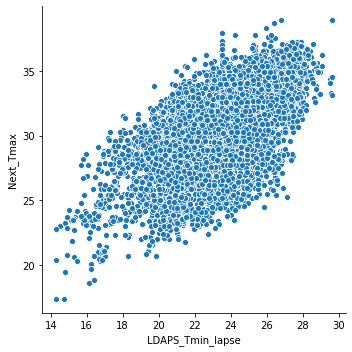

In [30]:
sns.relplot(x='LDAPS_Tmin_lapse',y='Next_Tmax',data=data,kind='scatter')

Relation between Present_Tmax and LDAPS_Tmin_lapse is also positive.

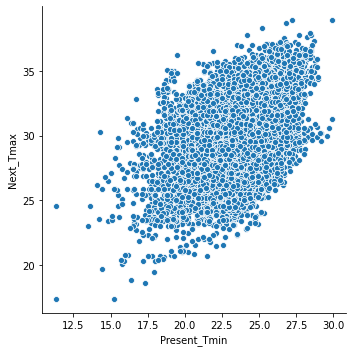

In [31]:
sns.relplot(x='Present_Tmin',y='Next_Tmax',data=data,kind='scatter')

We can see relationship between Present_Tmin and Next_Tmin is positive.

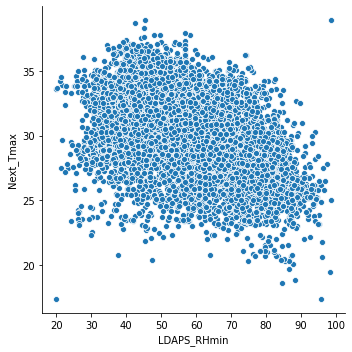

In [32]:
sns.relplot(x='LDAPS_RHmin',y='Next_Tmax',data=data,kind='scatter')

We can see relationship between LDAPS_RHmin and Next_Tmax is negative.

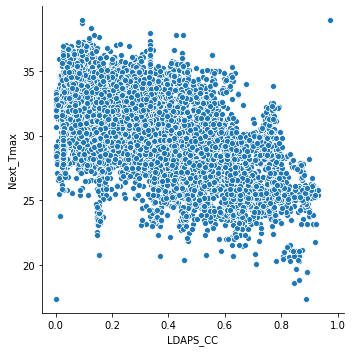

In [33]:
sns.relplot(x='LDAPS_CC',y='Next_Tmax',data=data,kind='scatter')

We can see relationship between LDAPS_CC and Next_Tmax is negative.

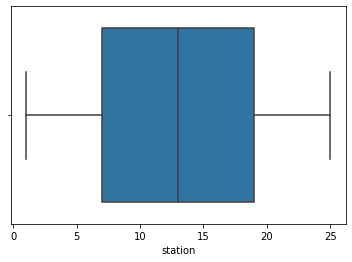

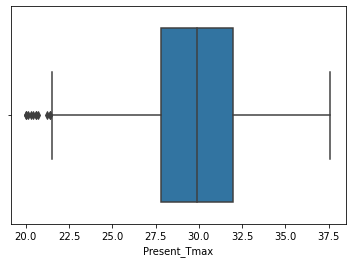

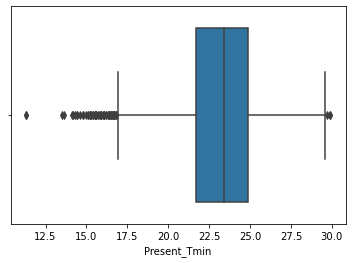

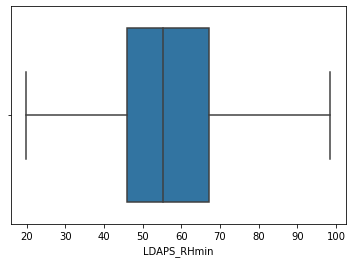

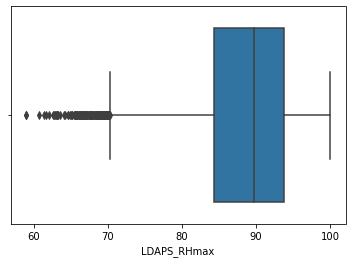

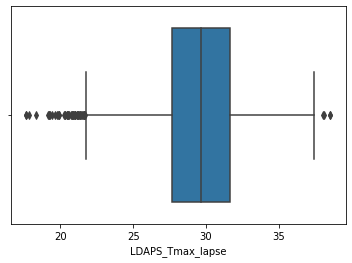

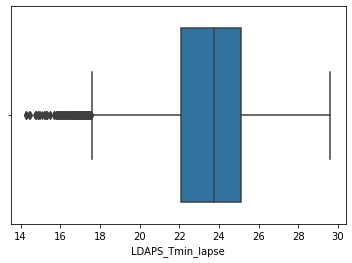

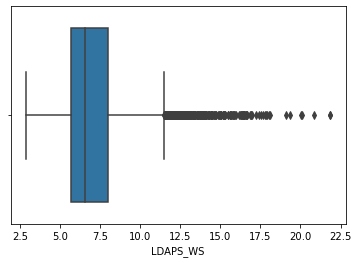

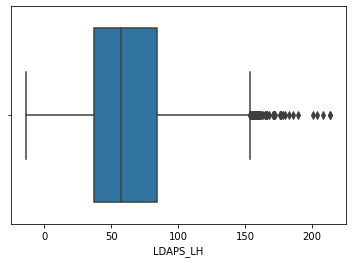

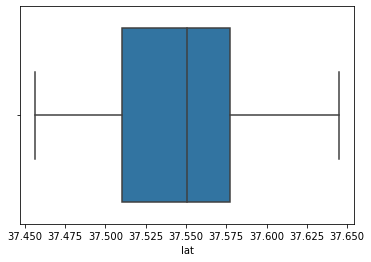

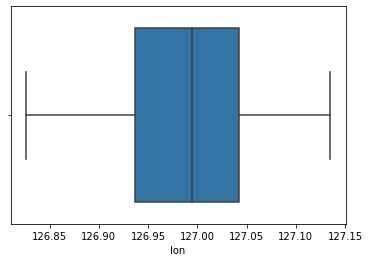

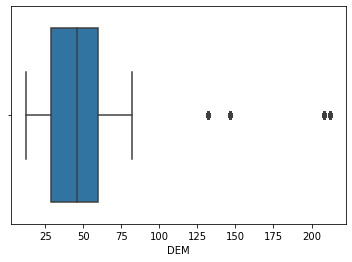

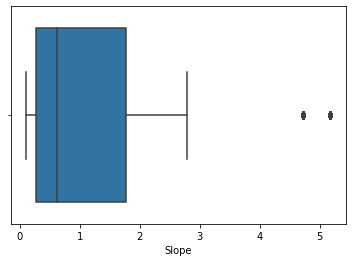

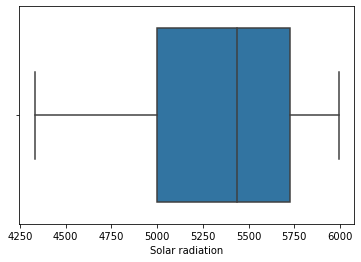

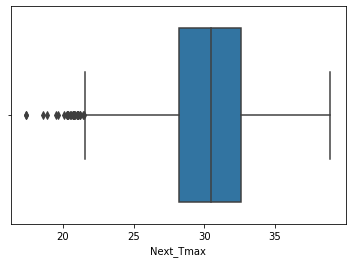

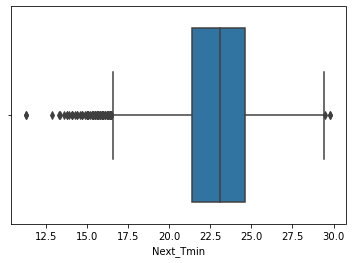

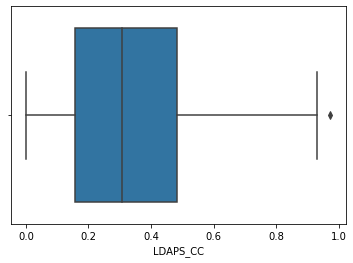

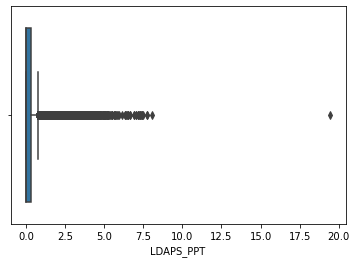

In [34]:
for i in data.columns:
        plt.figure()
        sns.boxplot(x=data[i])

We can see outliers in Present_Tmax, Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_PPT, DEM, Slope, Next_Tmax, Next_Tmin, LDAPS_CC, LDAPS_PPT.

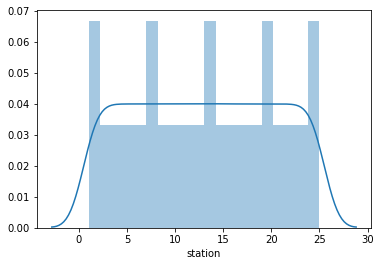

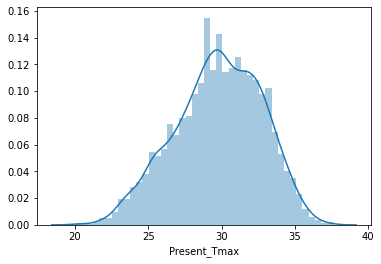

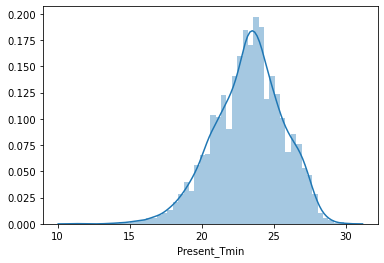

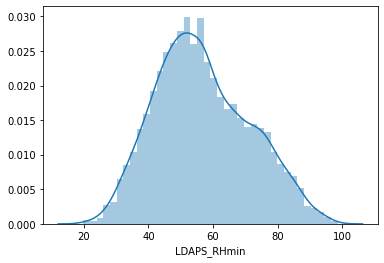

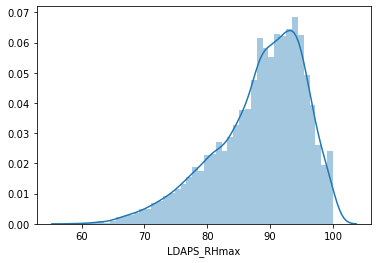

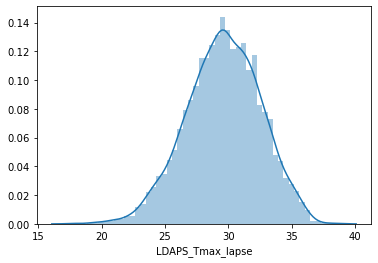

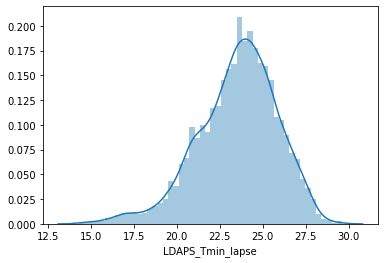

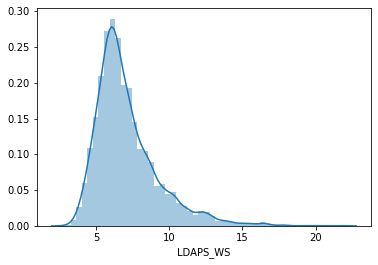

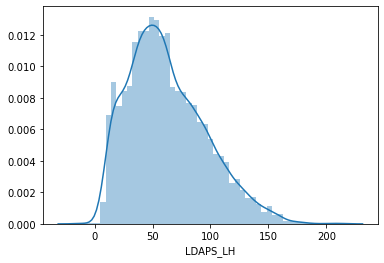

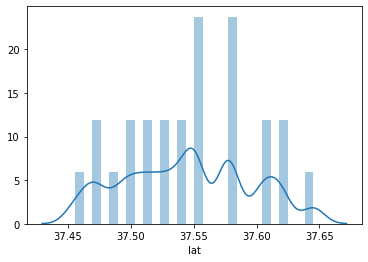

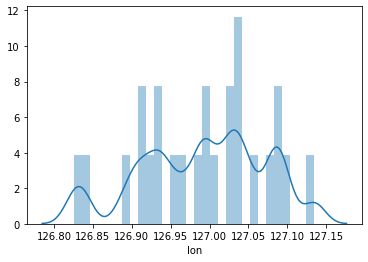

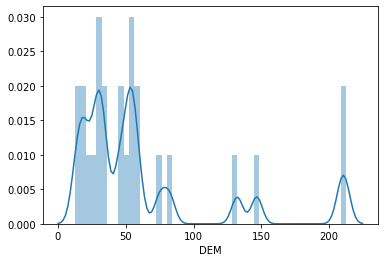

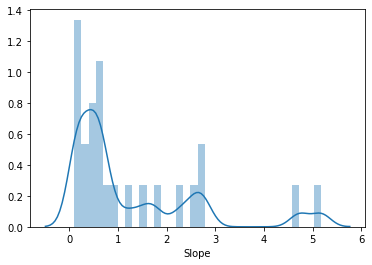

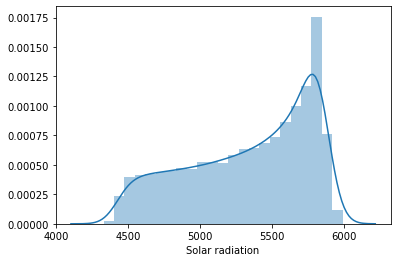

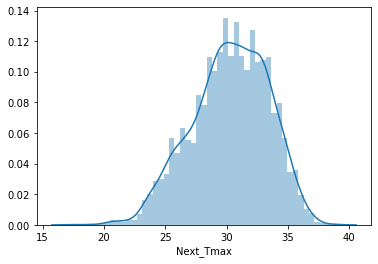

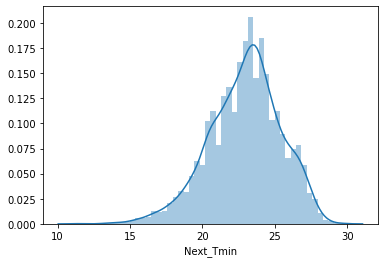

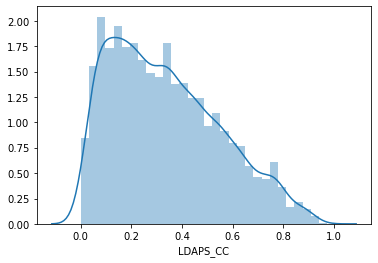

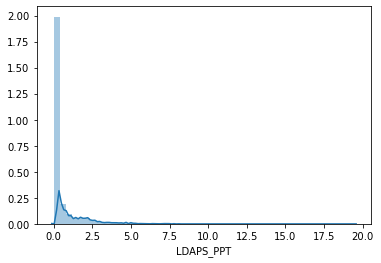

In [35]:
for i in data.columns:
        plt.figure()
        sns.distplot(data[i])

We can see uneven distribution in all columns.

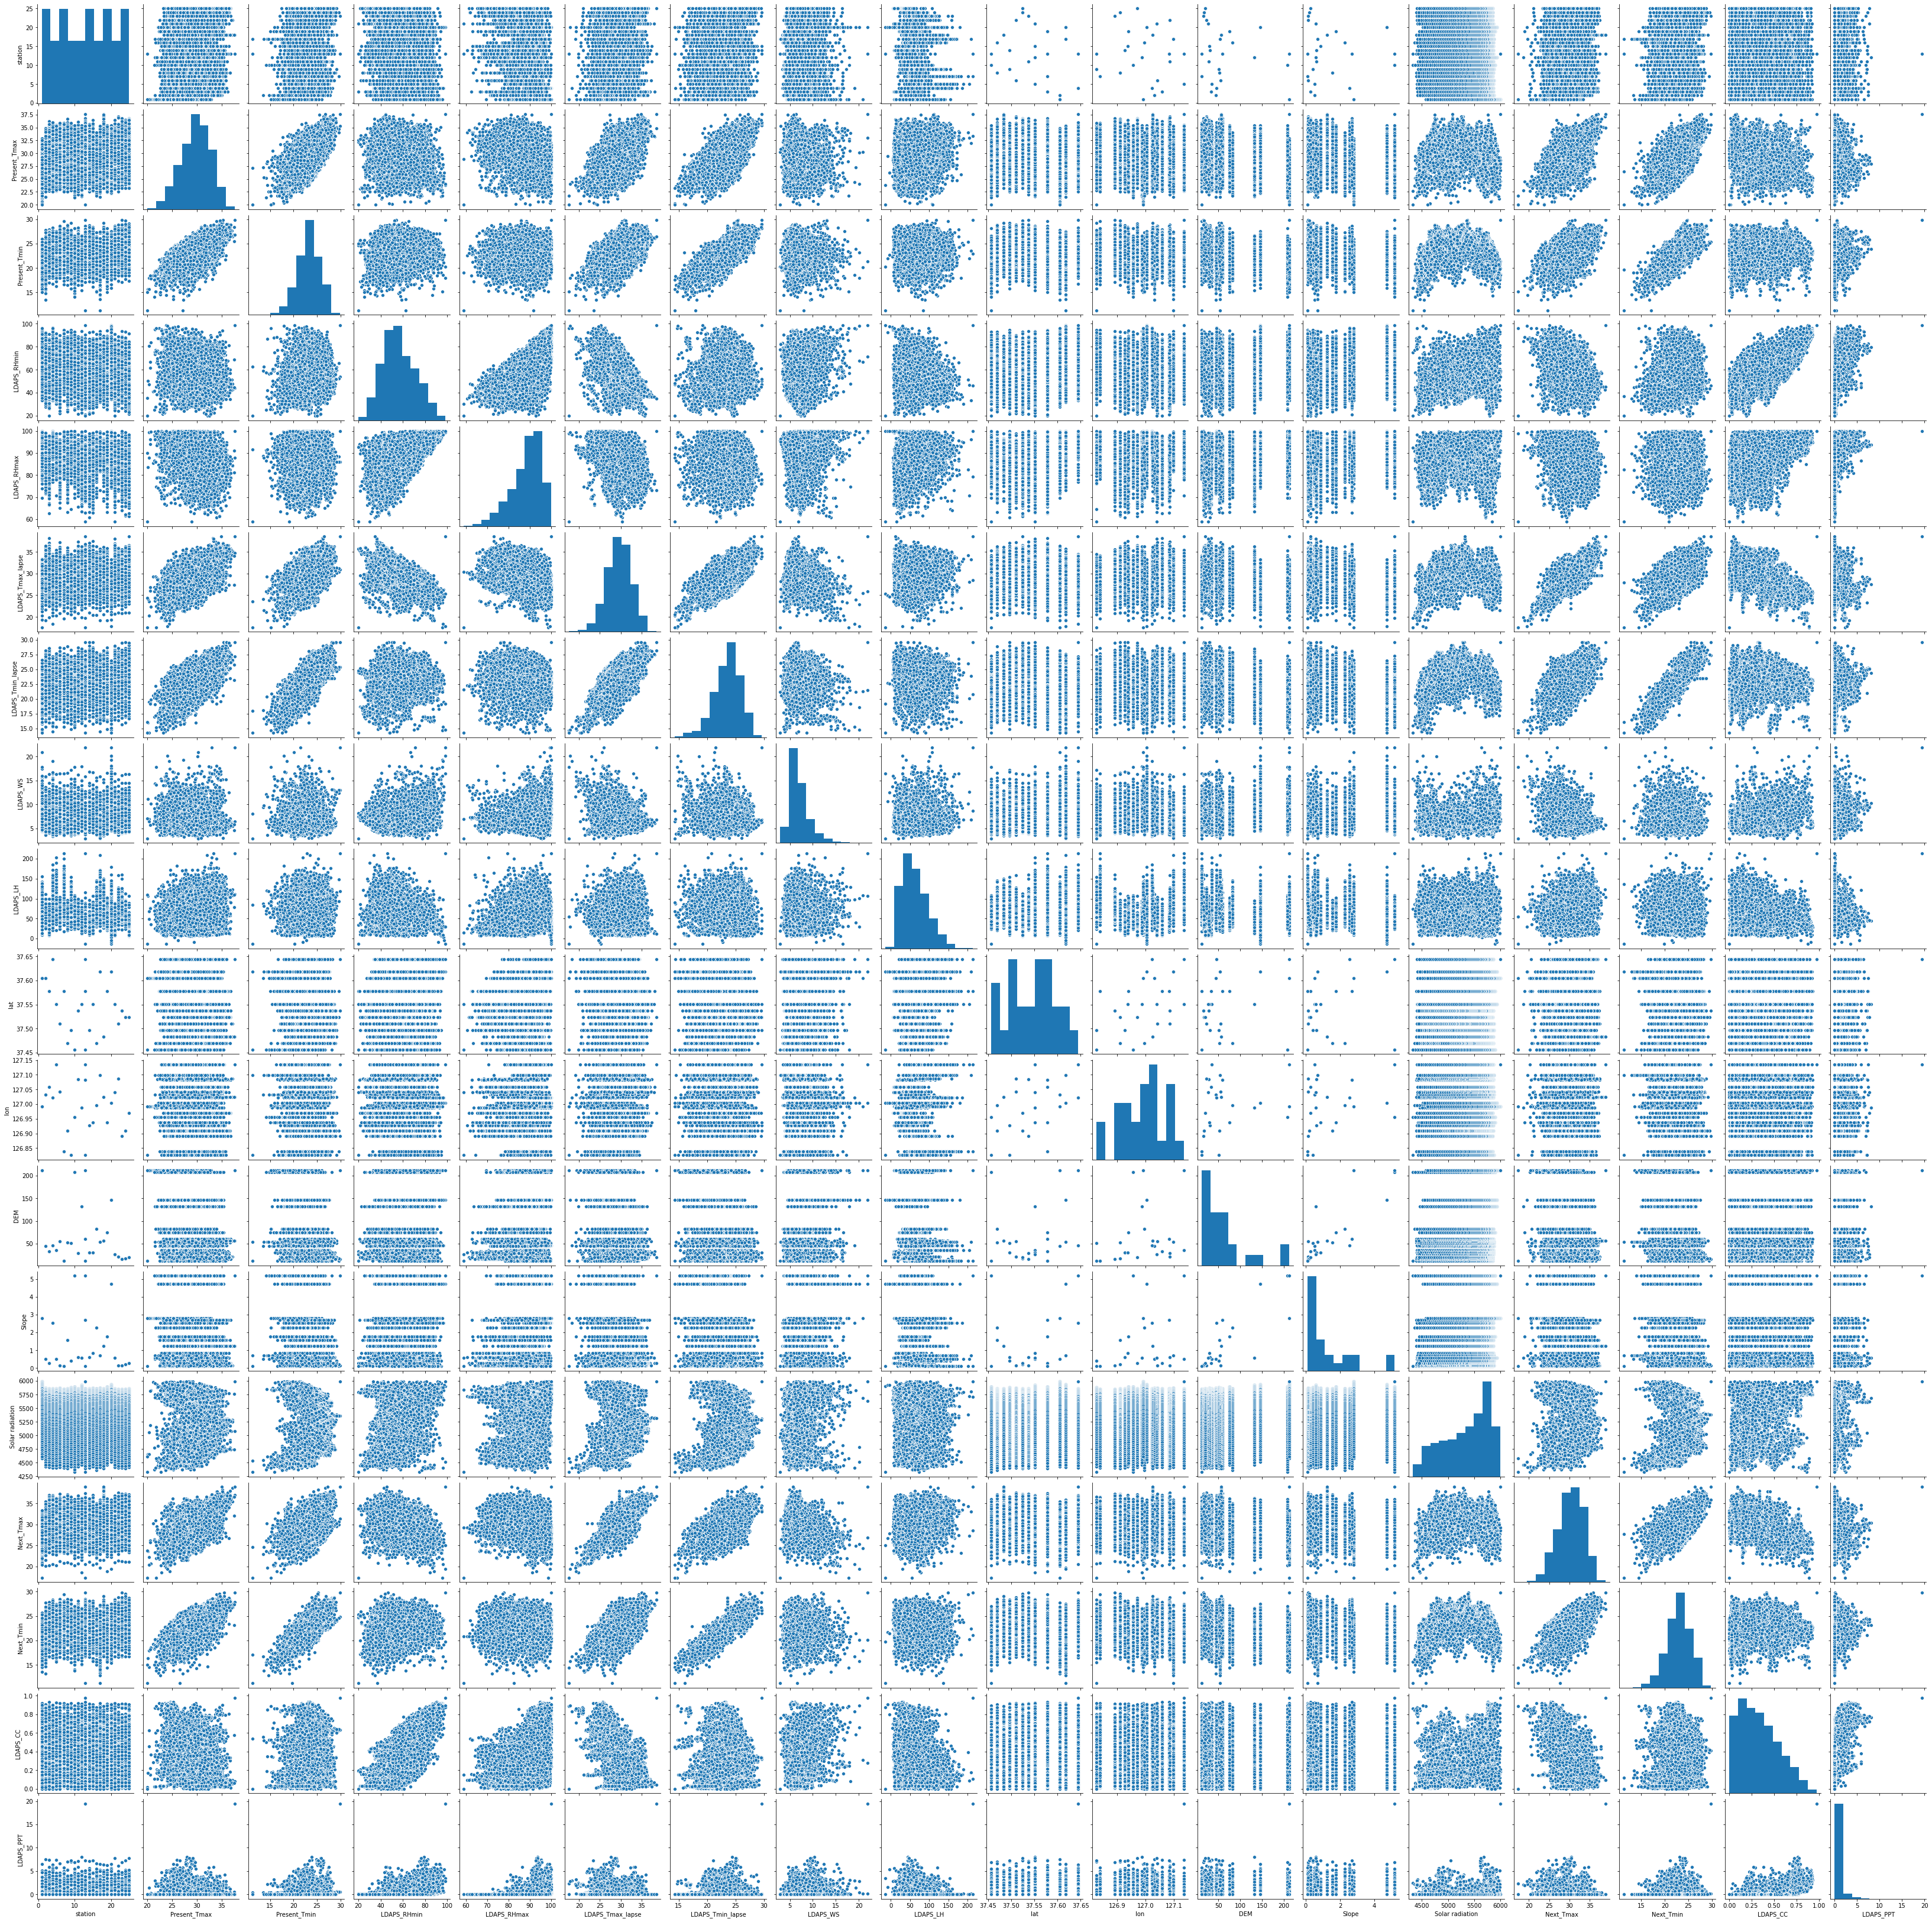

In [36]:
sns.pairplot(data)

In the above pairplot we can see relationship between all columns.

# Let's see the correlation now:

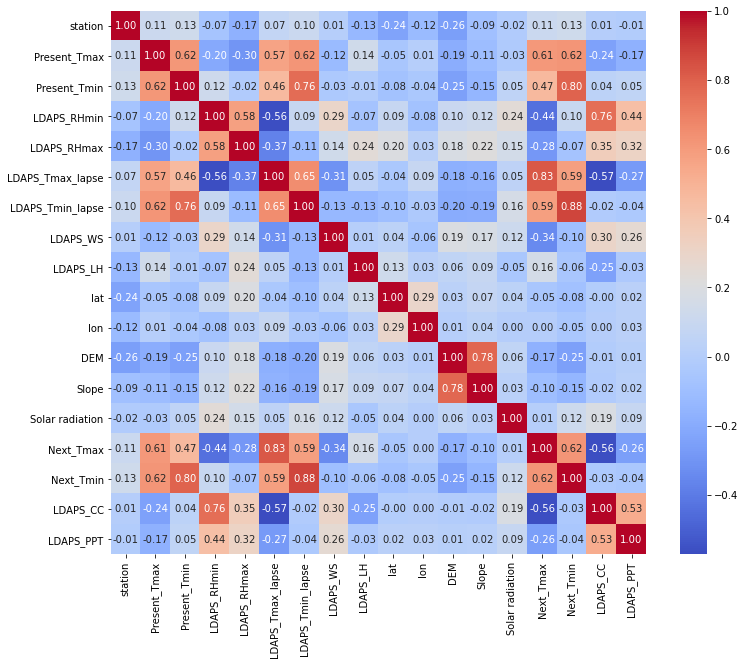

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [38]:
cor_matrix=data.corr()
cor_matrix['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.827189
Next_Tmin           0.621427
Present_Tmax        0.610348
LDAPS_Tmin_lapse    0.586983
Present_Tmin        0.471806
LDAPS_LH            0.157616
station             0.107983
Solar radiation     0.008795
lon                 0.003052
lat                -0.053510
Slope              -0.102725
DEM                -0.172538
LDAPS_PPT          -0.255109
LDAPS_RHmax        -0.283738
LDAPS_WS           -0.342729
LDAPS_RHmin        -0.437898
LDAPS_CC           -0.563697
Name: Next_Tmax, dtype: float64

In [39]:
cor_matrix=data.corr()
cor_matrix['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.880176
Present_Tmin        0.796670
Present_Tmax        0.622741
Next_Tmax           0.621427
LDAPS_Tmax_lapse    0.586868
station             0.128293
Solar radiation     0.120212
LDAPS_RHmin         0.095019
LDAPS_CC           -0.034870
LDAPS_PPT          -0.044088
lon                -0.046603
LDAPS_LH           -0.055440
LDAPS_RHmax        -0.071997
lat                -0.083533
LDAPS_WS           -0.096576
Slope              -0.146882
DEM                -0.246906
Name: Next_Tmin, dtype: float64

# Skewness and outliers removal:


In [40]:
data.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
LDAPS_CC            0.549589
LDAPS_PPT           4.229137
dtype: float64

In [41]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[ 1.6643153 ,  0.36132577,  0.75952931, ...,  0.6975993 ,
         0.71069963,  0.42207949],
       [ 1.52562236,  0.72108401,  0.6762959 , ...,  0.17406357,
         0.67123524,  0.42207949],
       [ 1.38692941,  0.61960809,  0.03118815, ...,  0.38974413,
         0.61482006,  0.42207949],
       ...,
       [ 1.6643153 ,  2.22171758,  2.42419767, ...,  2.2279345 ,
         1.4316987 ,  0.42207949],
       [ 0.        ,  3.30412736,  4.9628169 , ...,  4.68452522,
         1.55899949,  0.42207949],
       [ 0.        ,  2.64912642,  2.77789093, ...,  2.76579089,
         2.96328995, 19.79588508]])

In [42]:
#threshold=3
print(np.where(z>3))

(array([  25,   26,   27,   33,   36,   37,   41,   44,   45,  175,  194,
        269,  294,  304,  305,  307,  308,  309,  310,  311,  313,  315,
        317,  320,  321,  322,  323,  324,  325,  326,  328,  331,  341,
        343,  344,  344,  375,  394,  419,  494,  519,  525,  526,  527,
        528,  529,  530,  531,  532,  533,  534,  535,  536,  537,  538,
        539,  540,  541,  542,  543,  544,  544,  545,  546,  547,  548,
        549,  569,  575,  584,  594,  969, 1006, 1018, 1225, 1226, 1227,
       1229, 1230, 1234, 1235, 1236, 1237, 1238, 1240, 1242, 1243, 1245,
       1246, 1248, 1249, 1324, 1424, 1494, 1652, 1661, 1663, 1664, 1670,
       1674, 1750, 1753, 1758, 1768, 1769, 1778, 1779, 1781, 1791, 1794,
       1981, 1982, 1984, 1990, 1992, 2175, 2176, 2177, 2178, 2179, 2179,
       2180, 2181, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189,
       2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2353,
       2354, 2356, 2369, 2375, 2378, 2394, 2441, 2

In [43]:
data_new=data[(z<3).all(axis=1)] #removing outliers

In [44]:
data.shape

(7752, 18)

In [45]:
data_new.shape

(7273, 18)

In [46]:
#Percentage data loss:
loss_percent=(7752-7468)/7752*100
print(loss_percent)

3.663570691434469


After removing outliers, we have lost 3.66% data.

# Let's seperate independent and dependent variables:

In [47]:
a=['Next_Tmax','Next_Tmin'] #target columns

In [48]:
x=data_new.drop(a, axis=1)
y=data_new[a]
print(x.shape)
print(y.shape)

(7273, 16)
(7273, 2)


In [49]:
from sklearn.preprocessing import power_transform
data_new=power_transform(x)

data_new=pd.DataFrame(data_new,columns=x.columns)

In [50]:
data_new.skew()

station            -0.201655
Present_Tmax       -0.032168
Present_Tmin       -0.020211
LDAPS_RHmin        -0.017423
LDAPS_RHmax        -0.105936
LDAPS_Tmax_lapse   -0.012906
LDAPS_Tmin_lapse   -0.023703
LDAPS_WS            0.008042
LDAPS_LH           -0.024293
lat                 0.000000
lon                -0.199551
DEM                 0.038367
Slope               0.235167
Solar radiation    -0.167854
LDAPS_CC            0.047912
LDAPS_PPT           0.991627
dtype: float64

We can see, now skewness has been reduced.

# Let's perform scaling now:

In [51]:
from sklearn.preprocessing import MinMaxScaler
mmc=MinMaxScaler()
mmc.fit_transform(data_new)

array([[0.        , 0.38949293, 0.32936388, ..., 1.        , 0.31847597,
        0.        ],
       [0.0624368 , 0.59043837, 0.34316079, ..., 0.87898094, 0.33095614,
        0.        ],
       [0.11941769, 0.57071506, 0.4643616 , ..., 0.87357009, 0.34849423,
        0.        ],
       ...,
       [0.93283746, 0.09756165, 0.05671428, ..., 0.02321456, 0.05530181,
        0.        ],
       [0.96659904, 0.09756165, 0.09197104, ..., 0.02156801, 0.05518806,
        0.        ],
       [1.        , 0.0927133 , 0.07422807, ..., 0.02590581, 0.05459332,
        0.        ]])

In [52]:
x=data_new

In [53]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    Ln=LinearRegression()
    Ln.fit(x_train,y_train)
    pred=Ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is ",maxAcc, " at Random State ",maxRS)

Best accuracy is  0.8002424496652771  at Random State  93


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [55]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),ElasticNet(alpha=0.0001),KNeighborsRegressor()]
for m in model:
    m.fit(x_train,y_train)
    #sc=m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(y_test,predm)
    print('Accuracy Score of',m,'is:',acc)
    print('mean_absolute_error:',mean_absolute_error(y_test,predm))
    print('mean_squared_error:',mean_squared_error(y_test,predm))
    print('Root mean_squared_error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("\n")

Accuracy Score of LinearRegression() is: 0.8002424496652771
mean_absolute_error: 0.9347516087283632
mean_squared_error: 1.5073691258852229
Root mean_squared_error: 1.2277496185644787


Accuracy Score of RandomForestRegressor() is: 0.8875432229766664
mean_absolute_error: 0.6892706699585185
mean_squared_error: 0.8340830369943386
Root mean_squared_error: 0.913281466468218


Accuracy Score of DecisionTreeRegressor() is: 0.7461737926990217
mean_absolute_error: 0.9947717390095527
mean_squared_error: 1.8922813553100208
Root mean_squared_error: 1.3756021791601019


Accuracy Score of ElasticNet(alpha=0.0001) is: 0.8002416009445421
mean_absolute_error: 0.9347502481506467
mean_squared_error: 1.507379674671117
Root mean_squared_error: 1.2277539145411498


Accuracy Score of KNeighborsRegressor() is: 0.8170813088412975
mean_absolute_error: 0.8895576347601728
mean_squared_error: 1.376121521556653
Root mean_squared_error: 1.1730820608792263




# Cross Validation of model:

In [56]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),ElasticNet(alpha=0.0001),KNeighborsRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for",m,"is: ",score.mean())

Score for LinearRegression() is:  0.7156765702831352
Score for RandomForestRegressor() is:  0.6906792852088978
Score for DecisionTreeRegressor() is:  0.4472831788120821
Score for ElasticNet(alpha=0.0001) is:  0.7156882568725156
Score for KNeighborsRegressor() is:  0.6218519223597692


With LinearRegression model and ElasticNet(alpha=0.0001) there is very less difference in accuracy and cross validation score, We will take best model as LinearRegression.

# Hyper Parameter Tunning:

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
Param={'fit_intercept':[True,False],'normalize':[True,False],
       'copy_X':[True,False],'n_jobs':[0,1,2,3,4,5]}

In [60]:
GCV=GridSearchCV(LinearRegression(),Param,cv=5)

In [61]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [0, 1, 2, 3, 4, 5],
                         'normalize': [True, False]})

In [62]:
GCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 0, 'normalize': True}

In [63]:
GCV_pred=GCV.best_estimator_.predict(x_test) 
GCV_pred

array([[28.31191896, 21.56080913],
       [28.84093923, 22.0286687 ],
       [25.31187006, 17.84827457],
       ...,
       [27.82239219, 23.8699744 ],
       [25.91394811, 21.05832676],
       [32.88167994, 21.90707621]])

In [64]:
r2_score(y_test,GCV_pred)

0.8002424496652774

After performing GridSearchCV method accuarcy is 80.02%

# Saving best model:

In [65]:
import joblib
joblib.dump(GCV,"GCVForecast.obj")

['GCVForecast.obj']

In [66]:
GCVfile=joblib.load("GCVForecast.obj")
GCVfile.predict(x_test)

array([[28.31191896, 21.56080913],
       [28.84093923, 22.0286687 ],
       [25.31187006, 17.84827457],
       ...,
       [27.82239219, 23.8699744 ],
       [25.91394811, 21.05832676],
       [32.88167994, 21.90707621]])

Called the saved model and predict